In [19]:
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd 
import numpy as np
import os.path
import seaborn as sns

pd.options.mode.chained_assignment = None  
sns.set(context='talk', style='white', rc={'figure.facecolor':'white'}, font_scale=1)

# read ibd

In [2]:
ibd = pd.read_csv("/opt/genomics/IPHinvestigators/ccaggiano/previous_reference/ilash/summed_no_related.csv", header=None)

In [3]:
ibd.head()

,0,1,2,3,4,5
0,"('0_HGDP00837', '0_S_Surui-2')",3024.25587,187,0_HGDP00837,0_S_Surui-2,"('0_HGDP00837', '0_S_Surui-2')"
1,"('0_HGDP00832', '0_HGDP00837')",2850.37362,196,0_HGDP00832,0_HGDP00837,"('0_HGDP00832', '0_HGDP00837')"
2,"('0_HGDP00837', '0_HGDP00849')",2646.35156,176,0_HGDP00837,0_HGDP00849,"('0_HGDP00837', '0_HGDP00849')"
3,"('0_HGDP00837', '0_HGDP00843')",2606.71754,144,0_HGDP00837,0_HGDP00843,"('0_HGDP00837', '0_HGDP00843')"
4,"('0_HGDP00832', '0_HGDP00843')",2563.07138,169,0_HGDP00832,0_HGDP00843,"('0_HGDP00832', '0_HGDP00843')"


In [4]:
ibd_matrix = ibd[[3, 4, 1]].values

# make graph

In [5]:
edges_list = list(map(tuple,ibd_matrix))

In [6]:
G = nx.Graph()

In [7]:
G.add_weighted_edges_from(edges_list)

# louvain partitioning

In [ ]:
# partition = community_louvain.best_partition(G)

In [ ]:
# max(partition.values())

In [ ]:
# partition_df = pd.DataFrame.from_dict(partition,  orient='index').reset_index()

In [19]:
# partition_df.to_csv("/opt/genomics/IPHinvestigators/ccaggiano/previous_reference/ilash/louvain_redone.csv", index=False, header=False)

# subpartition 

In [9]:
partition_df = pd.read_csv("/opt/genomics/IPHinvestigators/ccaggiano/previous_reference/ilash/louvain_redone.csv", header=None)

In [10]:
partition_df.columns = ["index", "cluster"]

In [12]:
for i in [3]: 
    for j in [2]:

#     fname = f"/opt/genomics/IPHinvestigators/ccaggiano/june21_atlas_update/final_qc/phased/ilash/louvain/louvain_subclusters{i}.csv"
        fname = f"/opt/genomics/IPHinvestigators/ccaggiano/previous_reference/ilash/louvain_subclusters_redone/louvain_subclusters{i}.csv"
    
        if os.path.isfile(fname): 
            partition_df = pd.read_csv(fname, header=None)
            partition_df.columns = ["index", "cluster"]
            num_of_com = partition_df["cluster"].nunique()


            print(i, j)

            nodes = partition_df[partition_df["cluster"] == j]["index"].values
            size = partition_df[partition_df["cluster"] == j]["cluster"].count()

            H = G.subgraph(nodes)
            subpartition = community_louvain.best_partition(H)
            subpartition_df = pd.DataFrame.from_dict(subpartition,  orient='index').reset_index()

            outname = f"/opt/genomics/IPHinvestigators/ccaggiano/previous_reference/ilash/louvain_subclusters_redone/louvain_subclusters{i}_{j}_redone.csv"
            subpartition_df.to_csv(outname, index=False, header=False)



3 2


In [8]:
# for i in range(20): 
#     for j in range(20):

# #     fname = f"/opt/genomics/IPHinvestigators/ccaggiano/june21_atlas_update/final_qc/phased/ilash/louvain/louvain_subclusters{i}.csv"
#         fname = f"/opt/genomics/IPHinvestigators/ccaggiano/previous_reference/ilash/louvain_subclusters_redone/louvain_subclusters{i}_{j}.csv"
    
#         if os.path.isfile(fname): 
#             partition_df = pd.read_csv(fname, header=None)
#             partition_df.columns = ["index", "cluster"]
#             num_of_com = partition_df["cluster"].nunique()

#             for k in range(num_of_com): 
#                 print(i, j, k)

#                 nodes = partition_df[partition_df["cluster"] == k]["index"].values
#                 size = partition_df[partition_df["cluster"] == k]["cluster"].count()

#                 H = G.subgraph(nodes)
#                 subpartition = community_louvain.best_partition(H)
#                 subpartition_df = pd.DataFrame.from_dict(subpartition,  orient='index').reset_index()

#                 outname = f"/opt/genomics/IPHinvestigators/ccaggiano/previous_reference/ilash/louvain_subclusters_redone/louvain_subclusters{i}_{j}_{k}.csv"
#                 subpartition_df.to_csv(outname, index=False, header=False)



# distribution within cluster 

In [11]:
group_labels = pd.read_csv("../top_community_ids.csv", header=None)

In [29]:
group_labels[1].unique()

array(['European', 'mexican and other hispanic/latino',
       'ashkenazi jewish', 'african american and afro-caribbean I',
       'chinese', 'filipino', 'japanese', 'korean', 'armenian',
       'persian muslim', 'punjabi + bengali', 'puerto rican', 'nigerian',
       'telugu', 'vietnamese', 'persian jewish', 'christian arab I',
       'pakistani', 'gujrati I', 'gujrati II', 'sindhi muslim',
       'christian arab II', 'colombian', 'pacific islander',
       'african american and afro-caribbean II', 'muslim arab',
       'Other Black?'], dtype=object)

In [134]:
group = "filipino"

In [135]:
nodes = group_labels[group_labels[1] == group][0].values

In [136]:
H = G.subgraph(nodes)

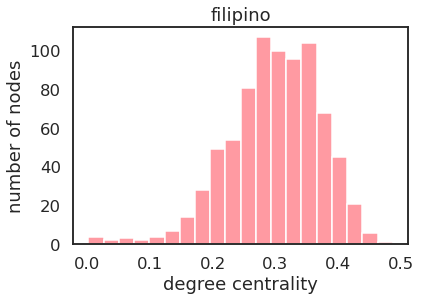

In [137]:
plt.hist(list(nx.degree_centrality(H).values()), bins=20, color="#FF9AA2")
plt.xlabel("degree centrality")
plt.ylabel("number of nodes")
plt.title(group)
plt.show()

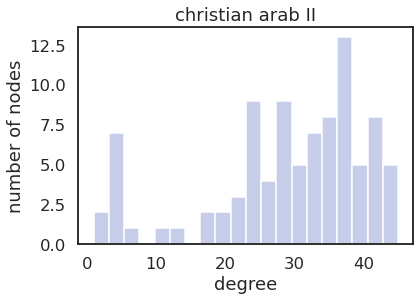

In [79]:
degrees = [H.degree(n) for n in H.nodes()]
plt.hist(degrees, bins=20, color="#C7CEEA")
plt.xlabel("degree")
plt.ylabel("number of nodes")
plt.title(group)
plt.show()

In [139]:
print(sorted(G.degree, key=lambda x: x[1], reverse=True))

[('0_92592_92592', 6460), ('0_67229_67229', 6430), ('0_54328_54328', 6424), ('0_26779_26779', 6349), ('0_40139_40139', 6333), ('0_90232_90232', 6311), ('0_17911_17911', 6310), ('0_50774_50774', 6306), ('0_93533_93533', 6296), ('0_55332_55332', 6290), ('0_52403_52403', 6282), ('0_57774_57774', 6282), ('0_96937_96937', 6271), ('0_53823_53823', 6269), ('0_68038_68038', 6262), ('0_48802_48802', 6260), ('0_90364_90364', 6259), ('0_72928_72928', 6256), ('0_73509_73509', 6250), ('0_29740_29740', 6249), ('0_68101_68101', 6244), ('0_58630_58630', 6244), ('0_76764_76764', 6241), ('0_27076_27076', 6237), ('0_69858_69858', 6234), ('0_53173_53173', 6230), ('0_17874_17874', 6230), ('0_72305_72305', 6227), ('0_72259_72259', 6227), ('0_49677_49677', 6226), ('0_63685_63685', 6225), ('0_96640_96640', 6222), ('0_93103_93103', 6221), ('0_71669_71669', 6221), ('0_55700_55700', 6219), ('0_75476_75476', 6218), ('0_58183_58183', 6217), ('0_50693_50693', 6212), ('0_43798_43798', 6212), ('0_72737_72737', 6211),

In [142]:
pageranks = nx.pagerank(G)

In [143]:
print(sorted(pageranks, key=lambda x: x[1], reverse=True))

['0_HGDP00837', '0_S_Surui-2', '0_HGDP00832', '0_HGDP00849', '0_HGDP00843', '0_S_Surui-1', '0_S_Karitiana-1', '0_S_Karitiana-2', '0_HGDP00838', '0_HGDP00995', '0_HGDP00845', '0_49973_49973', '0_51360_51360', '0_HGDP01010', '0_HGDP01019', '0_50052_50052', '0_67181_67181', '0_HGDP00998', '0_HGDP00999', '0_29094_29094', '0_72019_72019', '0_52816_52816', '0_71290_71290', '0_HGDP01001', '0_HGDP01050', '0_HGDP01056', '0_S_Pima-2', '0_HGDP01014', '0_57909_57909', '0_75232_75232', '0_B_Karitiana-3', '0_HGDP01013', '0_73737_73737', '0_98597_98597', '0_HGDP01058', '0_HGDP01043', '0_18216_18216', '0_67318_67318', '0_62820_62820', '0_HGDP01041', '0_52815_52815', '0_57880_57880', '0_HGDP00708', '0_HGDP00710', '0_HGDP00274', '0_HGDP00313', '0_HGDP00678', '0_HGDP00735', '0_69547_69547', '0_92978_92978', '0_HGDP00581', '0_HGDP00590', '0_45026_45026', '0_53164_53164', '0_63523_63523', '0_98211_98211', '0_HGDP01053', '0_53611_53611', '0_57133_57133', '0_HGDP01037', '0_HGDP01060', '0_72751_72751', '0_993

In [187]:
top_100 = sorted(pageranks, key=lambda x: x[1], reverse=True)[:1000]
top_100 = pd.DataFrame(top_100)

In [188]:
top_100 = top_100.merge(group_labels, on=0, how="left")

In [189]:
top_100[1] = top_100[1].replace({np.nan:"other"})

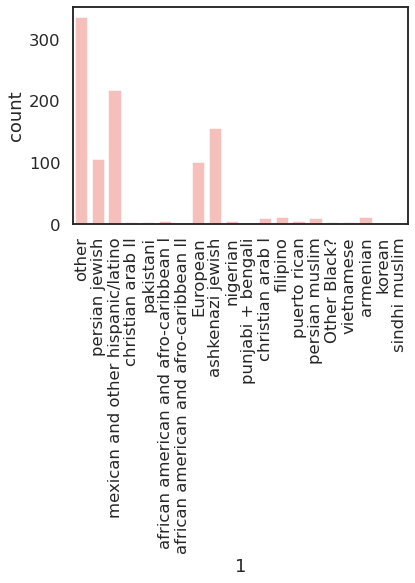

In [190]:
sns.countplot(x=1, data=top_100, color="#FFB7B2")
plt.xticks(rotation=90)
plt.show()

In [191]:
group = "filipino"
nodes = group_labels[group_labels[1] == group][0].values

In [195]:
partition_quality(G, partition)

NameError: name 'partition_quality' is not defined

In [196]:
nx.__version__

'2.5'